In this file, I try yet again to make a very simple cusp model.  After that, I will try to expand it.  This cusp model will literally be the simplest model possible that also includes dipole tilt.

$\phi_{cusp} = \phi_{0} + \psi$.

I'll use the Niehoff model for the dipole tilt.  I'll use $phi_{0} = 0.24 rad \sim 78^{\circ}$

Things to consider.  

1.  Datatypes.  Just make everything a np.array()
2.  The truth is the cusp model is a polar function so the MIDPOINT of the cusp may not be exactly what it's predicting.  But the other truth is, even after a few months of trying to understand this, I still feel like I don't fully understand it.




In [1]:
import tsyganenko as tsyg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacepy import coordinates as coord
import spacepy.time as spt
from spacepy.time import Ticktock
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
import sys
earth_radius_ax = 1.5*6371 #km
#adding the year data here so I don't have to crush my github repo
pathname = '../../data-se3-path-planner/yearData/cuspCrossings2019/'
pathname = '../../batch2019/'
sys.path.append(pathname)

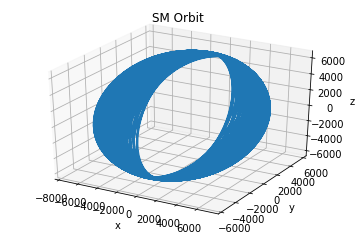

In [2]:
df = pd.read_csv(pathname + 'Jan55_results.csv')
GMAT_MJD_OFFSET = 29999.5
t = df['DefaultSC.A1ModJulian'] + GMAT_MJD_OFFSET
x = df['DefaultSC.gse.X']
y = df['DefaultSC.gse.Y']
z = df['DefaultSC.gse.Z']

#
xa = np.array(x)
ya = np.array(y)
za = np.array(z)
ta = np.array(t)

spacecraft = coord.Coords([[i,j,k] for i,j,k in zip(x,y,z)], 'GSE', 'car')
spacecraft.ticks = Ticktock(t,'MJD')
spacecraft = spacecraft.convert('SM','car')
points = 10000
# this figure validates what I already expected
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(spacecraft.x[:points],spacecraft.y[:points],spacecraft.z[:points])
plt.title('SM Orbit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


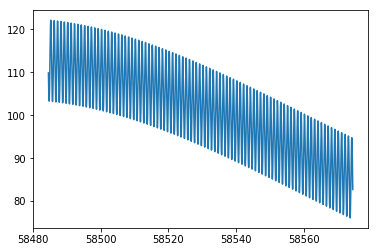

In [3]:
# this is the part where I actually do it

phi_0 = 0.24

psi = tsyg.getTilt(t)

# dude if i made a parthenthetical error like this ill be really sad

plt.plot(spacecraft.ticks.MJD, 90 - (phi_0 + psi))
plt.show()

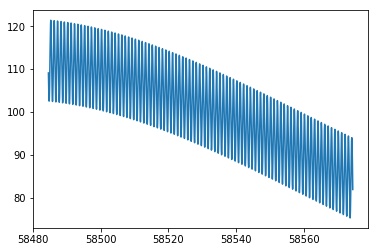

In [4]:
r = np.sqrt(xa**2 + ya**2 + za**2)
phi = (np.sqrt(r))/(np.sqrt(r - (1/np.sin(0.24)**2) - 1)) +psi

plt.plot(t,90 - phi)
plt.show()